In [1]:
import numpy as np
import pandas as pd
import pickle
import math

In [2]:
with open('pairs_final.pkl', 'rb') as f:
    pairs_dic = pickle.load(f)
pairs_dic

{('NEARUSDT', 'TRXUSDT'): 0.03,
 ('NEARUSDT', 'XRPUSDT'): 0.18,
 ('LINKUSDT', 'XRPUSDT'): 0.06,
 ('ADAUSDT', 'NEOUSDT'): 27.67,
 ('ADAUSDT', 'TRXUSDT'): 0.18,
 ('DOTUSDT', 'TRXUSDT'): 0.01,
 ('SOLUSDT', 'TRXUSDT'): 0.0,
 ('BTCUSDT', 'TRXUSDT'): 0.0,
 ('NEOUSDT', 'TRXUSDT'): 0.01,
 ('LINKUSDT', 'TRXUSDT'): 0.01,
 ('DOGEUSDT', 'TRXUSDT'): 0.79,
 ('DOTUSDT', 'NEARUSDT'): 0.35,
 ('ETHUSDT', 'TRXUSDT'): 0.0,
 ('NEOUSDT', 'SOLUSDT'): 2.07}

In [3]:
for key in pairs_dic:
    ticker1 = key[0]
    ticker2 = key[1]
    hedge = pairs_dic[key]
    print(f"EQUATION: {ticker2}={hedge}*{ticker1}")

EQUATION: TRXUSDT=0.03*NEARUSDT
EQUATION: XRPUSDT=0.18*NEARUSDT
EQUATION: XRPUSDT=0.06*LINKUSDT
EQUATION: NEOUSDT=27.67*ADAUSDT
EQUATION: TRXUSDT=0.18*ADAUSDT
EQUATION: TRXUSDT=0.01*DOTUSDT
EQUATION: TRXUSDT=0.0*SOLUSDT
EQUATION: TRXUSDT=0.0*BTCUSDT
EQUATION: TRXUSDT=0.01*NEOUSDT
EQUATION: TRXUSDT=0.01*LINKUSDT
EQUATION: TRXUSDT=0.79*DOGEUSDT
EQUATION: NEARUSDT=0.35*DOTUSDT
EQUATION: TRXUSDT=0.0*ETHUSDT
EQUATION: SOLUSDT=2.07*NEOUSDT


In [15]:
resolution = '1D'
ticker1 ="XRP-USD"
ticker2 ="NEAR-USD"

In [13]:
df

,time,Open,High,Low,Close,Adj Close,Volume,ticker
0,2022-05-26,0.513953,0.520108,0.466368,0.480883,0.480883,909554798,ADA-USD
1,2022-05-27,0.480643,0.482871,0.447367,0.455507,0.455507,922413717,ADA-USD
2,2022-05-28,0.458176,0.467449,0.449708,0.464764,0.464764,448858644,ADA-USD
3,2022-05-29,0.464732,0.481841,0.457380,0.481126,0.481126,444269488,ADA-USD
4,2022-05-30,0.481134,0.574956,0.478083,0.570073,0.570073,1185015742,ADA-USD
...,...,...,...,...,...,...,...,...
5851,2023-05-22,0.457575,0.466325,0.452150,0.461601,0.461601,904918280,XRP-USD
5852,2023-05-23,0.461609,0.466837,0.459444,0.465430,0.465430,829964870,XRP-USD
5853,2023-05-24,0.465441,0.465441,0.447464,0.453609,0.453609,1029450864,XRP-USD
5854,2023-05-25,0.453586,0.454629,0.445622,0.453734,0.453734,697466810,XRP-USD


OPTION 1: GET ALL TICKERS AND SLICE FOR THE SELECTED TICKER

In [16]:
alltickersfile = "data/tickers_"+ resolution +".csv"
df = pd.read_csv(alltickersfile)
df_sorted = df.set_index(["ticker", "time"]).sort_index() # set indexes
df1_sorted = df_sorted.xs(ticker1)  # the first ticker
df2_sorted = df_sorted.xs(ticker2)  # the second ticker

df1_h = hedge * df1_sorted
df_spread = df2_sorted.subtract(df1_h).round(5)
df_spread.head(20)

,Open,High,Low,Close,Adj Close,Volume
time,,,,,,
2022-05-26,4.90296,4.96697,4.30159,4.43676,4.43676,-3.781034e+09
2022-05-27,4.43293,4.46524,3.90462,3.99854,3.99854,-3.425225e+09
2022-05-28,4.07643,4.22806,3.93617,4.20576,4.20576,-1.480923e+09
2022-05-29,4.20488,4.39766,4.00037,4.37305,4.37305,-1.271465e+09
2022-05-30,4.37266,4.92753,4.30432,4.88871,4.88871,-2.394996e+09
2022-05-31,4.88983,5.61795,4.90648,5.06553,5.06553,-2.730971e+09
2022-06-01,5.06608,5.08434,4.46853,4.52611,4.52611,-2.663269e+09
2022-06-02,4.52503,4.80221,4.36523,4.76797,4.76797,-2.265215e+09
2022-06-03,4.76781,4.78382,4.36165,4.43891,4.43891,-2.348862e+09


OPTION 2: GET INDIVIDUAL TICKER FILES

In [17]:
# PICK FILENAME FORMAT
# "Y": "MA_1D.csv" for downloads with yfinance
# "T": "NYSE_MA, 1D.csv" for downloads from TradingView

file_format = "Y"

hedge = pairs_dic[(ticker1,ticker2)]
print(f"EQUATION: {ticker2}={hedge}*{ticker1}")

# need exchange info if fileformat is T
ticker1_exchange = 'BINANCE'
ticker2_exchange = 'BINANCE'

if file_format == "T":
    filename1 = "data/"+ ticker1_exchange.upper() +"_" + ticker1 + ", " + resolution.upper() + ".csv"
    filename2 = "data/"+ ticker2_exchange.upper() +"_" + ticker2 + ", " + resolution.upper() + ".csv"
elif file_format == "Y":
    filename1 = "data/"+ ticker1 +"_" + resolution.upper() + ".csv"
    filename2 = "data/"+ ticker2 +"_" + resolution.upper() + ".csv"
else:
    filename1 = "data/BINANCE_MA, 1D.csv"
    filename2 = "data/BINANCE_V, 1D.csv"

KeyError: ('XRP-USD', 'NEAR-USD')

In [18]:
df1 = pd.read_csv(filename1, parse_dates=["time"])
df2=pd.read_csv(filename2, parse_dates=["time"])

df1=df1.drop('ticker', axis=1)
df2=df2.drop('ticker', axis=1)

df1 = df1.dropna()
df2 = df2.dropna()

df2

NameError: name 'filename1' is not defined

In [19]:
def SMA(values, n):
    return pd.Series(values).rolling(n).mean()

df_spread['sma_20']=SMA(df_spread.Close, 20)

if resolution.upper() == '1H':
    df_spread['sma_20d']=SMA(df_spread.Close, 20*7) # add 20d sma for 1H only

df_spread[138:141]

,Open,High,Low,Close,Adj Close,Volume,sma_20
time,,,,,,,
2022-10-11,2.20055,2.19968,2.12291,2.16786,2.16786,-4.521421e+09,2.571553
2022-10-12,2.16785,2.18739,2.14162,2.14441,2.14441,-2.713958e+09,2.535673
2022-10-13,2.14462,2.14428,1.87599,2.04782,2.04782,-5.474446e+09,2.501149


In [20]:
def bb(data, sma, sd=2.0, n=20):
    std = data.rolling(n).std(ddof=1) # default ddof=1, sample standard deviation, divide by (n-1)
    bb_up = sma + std * sd
    bb_low = sma - std * sd
    return bb_up, bb_low

for i in range(1,4):
      df_spread['bb_up_'+str(i)], df_spread['bb_low_'+str(i)] = bb(df_spread['Close'], df_spread['sma_20'], i , 20)


df_spread_bb = df_spread.copy()
df_spread_bb['bb_up_2'], df_spread_bb['bb_low_2'] = bb(df_spread['Close'], df_spread['sma_20'], 2.0 , 20)

df_spread_bb = df_spread_bb.dropna()

df_spread_bb.head()

,Open,High,Low,Close,Adj Close,Volume,sma_20,bb_up_1,bb_low_1,bb_up_2,bb_low_2,bb_up_3,bb_low_3
time,,,,,,,,,,,,,
2022-06-14,2.85504,2.96672,2.57171,2.71771,2.71771,-3.617833e+09,4.141654,4.816169,3.467138,5.490685,2.792622,6.165200,2.118107
2022-06-15,2.71748,3.12706,2.42090,3.11028,3.11028,-4.143366e+09,4.075329,4.783668,3.366991,5.492006,2.658653,6.200344,1.950315
2022-06-16,3.10880,3.10531,2.49959,2.56171,2.56171,-2.702520e+09,4.003488,4.788715,3.218261,5.573942,2.433034,6.359169,1.647807
2022-06-17,2.56480,2.77046,2.53794,2.71119,2.71119,-2.595601e+09,3.928760,4.763293,3.094226,5.597826,2.259693,6.432360,1.425159
2022-06-18,2.70980,2.73356,2.29692,2.45734,2.45734,-2.619727e+09,3.832974,4.721991,2.943957,5.611007,2.054941,6.500024,1.165924


In [22]:
import pandas_ta as ta
#dfSPY.ta.indicators()
#help(ta.bbands)
my_bbands = ta.bbands(df_spread['Close'], length=20, std=2.0, ddof=1)  # default ddof=0, population standard deviation, divide by n

df_spread_bb = df_spread.copy()
df_spread_bb['bb_up_2'], df_spread_bb['bb_low_2'] = my_bbands['BBU_20_2.0'], my_bbands['BBL_20_2.0']

df_spread_bb = df_spread_bb.dropna()


GRAPH

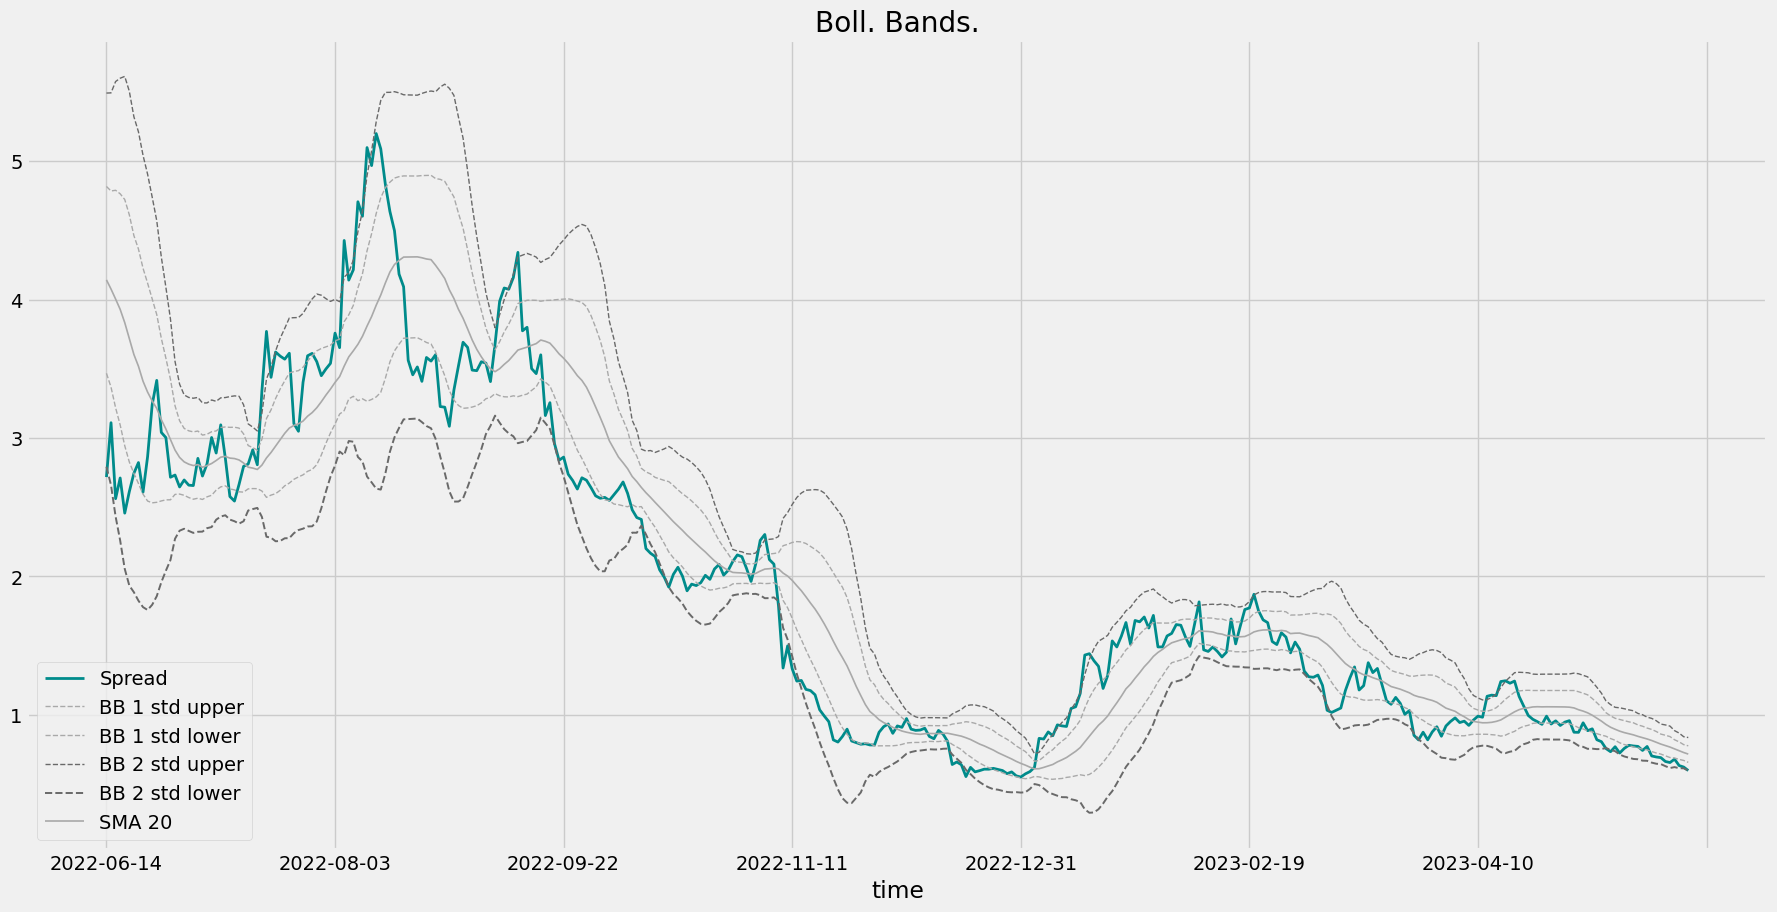

In [23]:
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)

def plot1(df, buysell=False):
    df['Close'].plot(label = 'Spread', color = 'darkcyan', linewidth = 2)
    df['bb_up_1'].plot(label = 'BB 1 std upper', linestyle = '--', linewidth = 1, color = 'darkgray')
    df['bb_low_1'].plot(label = 'BB 1 std lower', linestyle = '--', linewidth = 1, color = 'darkgray')
    df['bb_up_2'].plot(label = 'BB 2 std upper', linestyle = '--', linewidth = 1, color = 'dimgray')
    df['bb_low_2'].plot(label = 'BB 2 std lower', linestyle = '--', linewidth = 1.4, color = 'dimgray')
    df['sma_20'].plot(label = 'SMA 20',  linewidth = 1.2, color = 'darkgray')
    if resolution.upper() == '1H':
        df['sma_20d'].plot(label = 'SMA 20D',  linewidth = 1.4, color = 'darkgray')
    plt.legend(loc = 'lower left')
    plt.title('Boll. Bands.')
    
    if buysell:
        plt.scatter(df.index, buy_price, marker = '^', color = 'green', label = 'BUY', s = 200)
        plt.scatter(df.index, sell_price, marker = 'v', color = 'red', label = 'SELL', s = 200)
    
    plt.show()
    
plot1(df_spread_bb,0)

OR OPTION 2

In [24]:
# add short date & time for plotly
df_spread_bb['shortdate'] = df_spread_bb.index
df_spread_bb['shortdate']  = pd.to_datetime(df_spread_bb.shortdate,utc=True)
df_spread_bb['shortdate']  = df_spread_bb['shortdate'].dt.tz_convert("Canada/Pacific")
df_spread_bb['shortdate'] = df_spread_bb['shortdate'].dt.strftime('%m/%d %H:%M')

In [31]:
import plotly.graph_objects as go

def plot2(df, buysell=False):
    fig = go.Figure(data=[go.Candlestick(x=df.shortdate,
            open=df['Open'],
            high=df['High'],
            low=df['Low'],
            close=df['Close'],
            increasing_line_color= 'PaleGreen', decreasing_line_color= 'salmon'),
            go.Scatter(x=df.shortdate, y=df.sma_20, line=dict(color='darkgray', width=1), name="SMA 20"),
#             go.Scatter(x=df.shortdate, y=df.sma_20d, line=dict(color='darkgray', width=2), name="SMA 20D"),
            go.Scatter(x=df.shortdate, y=df['bb_low_2'], line=dict(color='dimgray', width=1, dash='dot'), name="BB 2 std lower"),
            go.Scatter(x=df.shortdate, y=df['bb_up_2'], line=dict(color='dimgray', width=1, dash='dot'), name="BB 2 std upper"),
            go.Scatter(x=df.shortdate, y=df['bb_low_1'], line=dict(color='darkgray', width=1, dash='dot'), name="BB 1 std lower"),
            go.Scatter(x=df.shortdate, y=df['bb_up_1'], line=dict(color='darkgray', width=1, dash='dot'), name="BB 1 std upper"),])

    if resolution.upper() == '1H':
        fig.add_scatter(x=df.shortdate, y=df.sma_20d, line=dict(color='darkgray', width=2), name="SMA 20D")

    fig.update_layout(xaxis_rangeslider_visible=False)
    #fig.update_layout(legend=dict(yanchor="bottom", y=1.0, xanchor="left", x=0.01))
    fig.update_xaxes(nticks=12) #default is 5
    fig.update_layout(xaxis=dict(type = "category")) #to eliminate after-hours
    
    if buysell:
        fig.add_scatter(x=df.shortdate, y=buy_price, mode="markers", marker_symbol="triangle-up", marker=dict(size=10, color="Green"), name="buy")
        fig.add_scatter(x=df.shortdate, y=sell_price, mode="markers", marker_symbol="triangle-down",marker=dict(size=10, color="Red"), name="sell")
    fig.show()
 
plot2(df_spread_bb,0)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

STRATEGY 1

In [32]:
# buy and sell at upper and lower bollinger band, exit at sma
def strategy_exit_sma(data, lower_bb, upper_bb, sma_20):
    buy_price = []
    sell_price = []
    bb_signal = []
    position = []
    signal = 0
      
    position = [0] * len(data)
      
    for i in range(len(data)):
        # define band crossings
        if data[i - 1] > lower_bb[i - 1] and data[i] < lower_bb[i]:
            if position[i-1] == 0:
                buy_price.append(data[i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
                position[i] = 1
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
                position[i] = position[i-1]
        elif data[i - 1] < upper_bb[i - 1] and data[i] > upper_bb[i]:
            if position[i-1] == 0:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                signal = -1
                bb_signal.append(signal)
                position[i] = -1
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
                position[i] = position[i-1]

        # define sma crossings
        elif data[i - 1] > sma_20[i - 1] and data[i] < sma_20[i]:
            if position[i-1] != 0:
                buy_price.append(data[i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
                position[i] = 0
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
                position[i] = position[i-1]
        elif data[i - 1] < sma_20[i - 1] and data[i] > sma_20[i]:
            if position[i-1] != 0:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                signal = -1
                bb_signal.append(signal)
                position[i] = 0
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
                position[i] = position[i-1]

        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)
            position[i] = position[i-1]

    return buy_price, sell_price, bb_signal, position


buy_price, sell_price, bb_signal, position = strategy_exit_sma(
    df_spread_bb["Close"],
    df_spread_bb["bb_low_2"],
    df_spread_bb["bb_up_2"],
    df_spread_bb["sma_20"],
)

STRATEGY 2

In [33]:
# buy and sell at upper and lower bollinger band, keep position, no exit
def strategy_no_exit(data, lower_bb, upper_bb):

    buy_price = []
    sell_price = []
    bb_signal = []
    position = []
    signal = 0
    
    # create a zero position list until the first signal
    for i in range(len(data)):
        position.append(0)
    
    for i in range(len(data)):
        if data[i - 1] > lower_bb[i - 1] and data[i] < lower_bb[i]:
            if signal != 1:
                buy_price.append(data[i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
                position[i] = 1
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
                position[i] = position[i-1]
        elif data[i - 1] < upper_bb[i - 1] and data[i] > upper_bb[i]:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                signal = -1
                bb_signal.append(signal)
                position[i] = -1
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
                position[i] = position[i-1]
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)
            position[i] = position[i-1]

    return buy_price, sell_price, bb_signal, position


buy_price, sell_price, bb_signal, position = strategy_no_exit(
    df_spread_bb["Close"], df_spread_bb["bb_low_2"], df_spread_bb["bb_up_2"]
)

STRATEGY 3 ('1H' RESOLUTION ONLY)

In [34]:
if resolution.upper() == '1H':  # enable only for '1H resolution'

    # buy and sell at upper and lower bollinger band, exit at sma, no exit if moving towards 20d-sma
    def strategy_skp_sma20d(data, lower_bb, upper_bb, sma_20, sma_20d):
        buy_price = []
        sell_price = []
        bb_signal = []
        position = []
        signal = 0

        position = [0] * len(data)

        for i in range(len(data)):
            # define band crossings
            if data[i - 1] > lower_bb[i - 1] and data[i] < lower_bb[i]:
                if position[i-1] != 1:
                    buy_price.append(data[i])
                    sell_price.append(np.nan)
                    signal = 1
                    bb_signal.append(signal)
                    position[i] = 1
                else:
                    buy_price.append(np.nan)
                    sell_price.append(np.nan)
                    bb_signal.append(0)
                    position[i] = position[i-1]
            elif data[i - 1] < upper_bb[i - 1] and data[i] > upper_bb[i]:
                if position[i-1] != -1:
                    buy_price.append(np.nan)
                    sell_price.append(data[i])
                    signal = -1
                    bb_signal.append(signal)
                    position[i] = -1
                else:
                    buy_price.append(np.nan)
                    sell_price.append(np.nan)
                    bb_signal.append(0)
                    position[i] = position[i-1]

            # define sma crossings
            elif data[i - 1] > sma_20[i - 1] and data[i] < sma_20[i]:
                if data[i] < sma_20d[i]: # check 20d-sma
                    if position[i-1] == -1:
                        buy_price.append(data[i])
                        sell_price.append(np.nan)
                        signal = 1
                        bb_signal.append(signal)
                        position[i] = 0
                    else:
                        buy_price.append(np.nan)
                        sell_price.append(np.nan)
                        bb_signal.append(0)
                        position[i] = position[i-1]

                else: # moving towards 20d-sma               
                    buy_price.append(np.nan)
                    sell_price.append(np.nan)
                    bb_signal.append(0)
                    position[i] = position[i-1]


            elif data[i - 1] < sma_20[i - 1] and data[i] > sma_20[i]:
                if data[i] > sma_20d[i]: # check 20d-sma
                    if position[i-1] == 1:
                        buy_price.append(np.nan)
                        sell_price.append(data[i])
                        signal = -1
                        bb_signal.append(signal)
                        position[i] = 0
                    else:
                        buy_price.append(np.nan)
                        sell_price.append(np.nan)
                        bb_signal.append(0)
                        position[i] = position[i-1]

                else: # moving towards 20d-sma               
                    buy_price.append(np.nan)
                    sell_price.append(np.nan)
                    bb_signal.append(0)
                    position[i] = position[i-1]

            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
                position[i] = position[i-1]

        return buy_price, sell_price, bb_signal, position


    buy_price, sell_price, bb_signal, position = strategy_skp_sma20d(
        df_spread_bb["Close"],
        df_spread_bb["bb_low_2"],
        df_spread_bb["bb_up_2"],
        df_spread_bb["sma_20"],
        df_spread_bb["sma_20d"],
    )

In [35]:
plot2(df_spread_bb,1)


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

BACKTEST

In [36]:
# Select bb to backtest
upper_bb = df_spread_bb['bb_up_2']
lower_bb = df_spread_bb['bb_low_2']
close_price = df_spread_bb['Close']
bb_signal_df = pd.DataFrame(bb_signal).rename(columns = {0:'bb_signal'}).set_index(df_spread_bb.index)
position_df = pd.DataFrame(position).rename(columns = {0:'bb_position'}).set_index(df_spread_bb.index)

frames = [close_price, upper_bb, lower_bb, bb_signal_df, position_df]
strategy = pd.concat(frames, join = 'inner', axis = 1)

In [40]:
df.head()

,time,Open,High,Low,Close,Adj Close,Volume,ticker
0,2022-05-26,0.513953,0.520108,0.466368,0.480883,0.480883,909554798,ADA-USD
1,2022-05-27,0.480643,0.482871,0.447367,0.455507,0.455507,922413717,ADA-USD
2,2022-05-28,0.458176,0.467449,0.449708,0.464764,0.464764,448858644,ADA-USD
3,2022-05-29,0.464732,0.481841,0.457380,0.481126,0.481126,444269488,ADA-USD
4,2022-05-30,0.481134,0.574956,0.478083,0.570073,0.570073,1185015742,ADA-USD


In [41]:

contract_price = df.iloc[-1,df.columns.get_loc('Close')] # get the latest price
avg_fin_cost = 0.0002
pos_value = 7500 # x2 for pair buy & sell
mar_req = 0.3 # margin requirement
cash_req = mar_req * pos_value * 2 # required cash
avg_slip = 0.001 # per order per position value
avg_commission = 0.007 # per contract

if resolution.upper() == '1H':
    avg_fin_cost = 0.0002/7

contracts = pos_value/contract_price
number_of_stocks = math.floor(contracts)

In [42]:
slip = bb_signal_df.bb_signal.abs()*avg_slip*pos_value
commission = bb_signal_df.bb_signal.abs()*avg_commission*contracts*2
fincost = position_df.bb_position.abs()*avg_fin_cost*(2*pos_value-cash_req)

In [44]:
import math
from termcolor import colored as cl

df_spread_bb_ret = pd.DataFrame(np.diff(df_spread_bb['Close'])).rename(columns = {0:'returns'})
bb_strategy_ret = []

# calculate return per bar
for i in range(len(df_spread_bb_ret)):
    try:
        returns = df_spread_bb_ret['returns'][i]*strategy['bb_position'][i]
        bb_strategy_ret.append(returns)    
        
    except:
        pass
    
bb_strategy_ret_df = pd.DataFrame(bb_strategy_ret).rename(columns = {0:'bb_returns'})

bb_investment_ret = []

for i in range(len(bb_strategy_ret_df['bb_returns'])):
    returns = number_of_stocks*bb_strategy_ret_df['bb_returns'][i]
    bb_investment_ret.append(returns)

bb_investment_ret_df = pd.DataFrame(bb_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(bb_investment_ret_df['investment_returns']), 2)
profit_percentage = math.floor((total_investment_ret/cash_req)*100)
print(cl('Profit/Loss (costs excluded): {}'.format(total_investment_ret), attrs = ['bold']))
print(cl('Profit/Loss (costs excluded): {}%'.format(profit_percentage), attrs = ['bold']))

Profit/Loss (costs excluded): 23359.24
Profit/Loss (costs excluded): 519%


Calculate cumulative returns:



In [45]:
cum_inv_ret = bb_investment_ret_df.cumsum()
cum_inv_ret.tail()

,investment_returns
341,24291.55392
342,24687.56624
343,23941.22912
344,23765.90528
345,23359.23792


In [46]:
mask = strategy.bb_signal!=0
orders = strategy[mask][['bb_signal']].reset_index()
orders.tail()

,time,bb_signal
4,2022-11-08,1
5,2023-01-04,-1
6,2023-03-08,1
7,2023-04-12,-1
8,2023-05-08,1


In [47]:
strategy2 = strategy[['bb_signal']].reset_index()
strategy2['cum_return'] = cum_inv_ret
strategy2

,time,bb_signal,cum_return
0,2022-06-14,1,6337.65008
1,2022-06-15,0,-2518.46400
2,2022-06-16,0,-105.25888
3,2022-06-17,0,-4203.41328
4,2022-06-18,0,-1698.18736
...,...,...,...
342,2023-05-22,0,24687.56624
343,2023-05-23,0,23941.22912
344,2023-05-24,0,23765.90528
345,2023-05-25,0,23359.23792


In [48]:
mask = strategy2.bb_signal!=0
orders = strategy2[mask][['bb_signal','cum_return']]
orders = orders.reset_index().dropna()

# values = df.Prices * df.Amount
# df['Values'] = values.where(df.Action == 'Sell', other=-values)

orders['prof_loss'] = orders.cum_return.diff()
# set the fist order profit/loss
display(orders)
orders.at[0, 'prof_loss'] = orders['cum_return'][0]

# set open position profit/loss
orders.at[len(orders), 'prof_loss'] = total_investment_ret - orders.loc[orders.index[-1],'cum_return']
# orders.at[len(orders)-1, 'index'] = len(strategy2)-1
# orders.at[len(orders)-1, 'bb_signal'] = -orders.loc[orders.index[-2],'bb_signal']
orders.at[len(orders)-1, 'cum_return'] = total_investment_ret

orders

,index,bb_signal,cum_return,prof_loss
0,0,1,6337.65008,NaN
1,34,-1,3023.12544,-3314.52464
2,118,1,27790.44304,24767.31760
3,143,-1,28591.99264,801.54960
4,147,1,29672.02624,1080.03360
5,204,-1,21555.30736,-8116.71888
6,267,1,17946.63904,-3608.66832
7,302,-1,19697.61728,1750.97824
8,328,1,25556.43632,5858.81904


,index,bb_signal,cum_return,prof_loss
0,0.0,1.0,6337.65008,6337.65008
1,34.0,-1.0,3023.12544,-3314.52464
2,118.0,1.0,27790.44304,24767.31760
3,143.0,-1.0,28591.99264,801.54960
4,147.0,1.0,29672.02624,1080.03360
5,204.0,-1.0,21555.30736,-8116.71888
6,267.0,1.0,17946.63904,-3608.66832
7,302.0,-1.0,19697.61728,1750.97824
8,328.0,1.0,25556.43632,5858.81904
9,NaN,NaN,23359.24000,-2197.19632


RESULT SUMMARY

/home/maria/Documents/GitHub/Pairs_trading/.venv/lib/python3.10/site-packages/seaborn/categorical.py:166: FutureWarning:

Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:k'` for same effect.



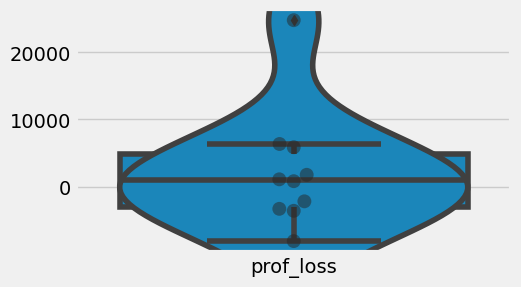

In [50]:
import seaborn as sb
_ = plt.figure(figsize=(5,3))
sb.violinplot(data=orders[["prof_loss"]], inner=None);
sb.swarmplot(data=orders[["prof_loss"]], size=10, color="k", alpha=0.5);
sb.boxplot(data=orders[["prof_loss"]]);

In [51]:
print(cl('Gross return: {}'.format(round(sum(orders['prof_loss']), 2)), attrs = ['bold']))
print(cl('Financial cost: {}'.format(-fincost.sum().round(1)), attrs = ['bold']))
print(cl('Total slip: {}'.format(-slip.sum().round(1)), attrs = ['bold']))
print(cl('Total commisson: {}'.format(-commission.sum().round(1)), attrs = ['bold']))
total_cost = slip.sum().round(1) + commission.sum().round(1)+fincost.sum().round(1)
print(cl('Net return: {}'.format(round(sum(orders['prof_loss'])-total_cost, 2)), attrs = ['bold']))

Gross return: 23359.24
Financial cost: -728.7
Total slip: -67.5
Total commisson: -2034.3
Net return: 20528.74
